# Trend Analysis using Python
       
<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 08/October/2024
    
        

In [ ]:
!pip install pandas_datareader yfinance

In [ ]:
import pandas as pd
import yfinance as yf

df_yahoo = yf.download('AAPL',
                       start='2000-01-01',
                       end='2010-12-31',
                       progress=False)
df_yahoo

In [ ]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2013, 1, 27)

df_gdp = web.DataReader('GDP', 'fred', start, end)
df_gdp

In [ ]:
from pandas_datareader import wb
df_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)
df_gdp


## Exercise 1: Analyzing Economic Indicators using Yahoo Finance API

Using the Yahoo Finance API, retrieve historical data for the following economic indicators:

* **US 10-Year Treasury Constant Maturity Rate:** `^TNX`
* **US 3-Month Treasury Bill Constant Maturity Rate:** `^IRX`
* **US Consumer Price Index (CPI):** `^GSPC`


In [ ]:
import pandas as pd
import yfinance as yf
tickers = ['^TNX', '^IRX', '^GSPC']
start_date = '2010-01-01'
end_date = '2023-12-31'
df_economic_indicators = yf.download(tickers, start=start_date, end=end_date)
df_economic_indicators


## Exercise 2: Analyzing Economic Indicators using Yahoo Finance API

Using the pandas_datareader, retrieve historical data for the following economic indicators:

* ** Federal Funds Rate - the interest rate that banks charge each other for overnight loans:** `FEDFUNDS`
* ** GDP per capita for Spain (ES), France (FR) and Germany (DE):** `NY.GDP.PCAP.KD`


In [ ]:
import pandas as pd
import pandas_datareader.data as web

# Retrieve data from FRED
federal_funds_rate = web.DataReader('FEDFUNDS', 'fred', start='2020-01-01', end='2023-12-31')
print(federal_funds_rate.tail())

from pandas_datareader import wb
df_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country = ['ES', 'FR', 'DE'], start=2005, end=2008)
df_gdp

# Time Series Analysis

Time series forecasting is __fundamental for various use cases in different domains such as energy
systems and economics__. 


## What is the time series
A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements. [1]

### Brent Crude Oil Last Day

In [ ]:
import yfinance as yfin
import datetime
start=datetime.datetime(2024,3,1)

stock_symbol='BZ=F' # BZ=F is the ticker of the Brent Crude Oil Last Day Financial Futures on the New York Mercantile Exchange (NYMEX)

df_brent = yf.download(stock_symbol, start=start)
df_brent 

### Making the series stationary

In [ ]:
df_brent["return"] = df_brent["Close"]/df_brent["Close"].shift(1)
df_brent = df_brent.dropna()
df_brent

### Test for autocorrelation

We will use the Durbin-Watson test for autocorrelation.  The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.


The Hypotheses for the Durbin Watson test are:
H0 = no first order autocorrelation.
H1 = first order correlation exists.
(For a first order correlation, the lag is one time unit).
Assumptions are:


The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

* 1.5 to 2.5 is no autocorrelation.
* 0 to <1.5 is positive autocorrelation (common in time series data).
* \>2.5 to 4 is negative autocorrelation (less common in time series data).

In [ ]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(df_brent["Close"]))

We OK to go as autocorrelation exists!

Autocorrelation is necessary when using univariate time series forecasting, __if autocorrelation does not exist__ we need to __introduce exogenous variables__ and perform multivariate time series analysis. Although some techiniques have been generalised to be multivariate, without doubt, __LSTM and related techiniques are the most frequent in this case__. We will see LSTM next VC ;-)  

### Auto Regressive Model using ARIMA from statsmodels

To create our moving average model we shall use ARIMA from statsmodels. This is a composite of an autoregressive model, AR(p), an integration model, I(d), and a moving average model, MA(q), which is passed via the tuple order(p,d,q). Here we shall use again a window of p=1:

Moving Average (MA) Models  - Short Memory Models

In a Moving Average 1, MA(1), the forecast is calculated based on the error of the previous day.

In a Moving Average q, MA(q), the forecast is calculated based on the moving average errors of the __q__ previous day.


#### VIDEO: 
MA Models - https://www.youtube.com/watch?v=zNLG8tsA_Go

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(2, 0, 0))
results = ARMA_model.fit()
print(results.summary())

start_date = '2024-03-04'
end_date   = '2024-10-08'
df_brent['forecast_ar2'] = results.predict(start=start_date)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(0, 1, 0))
results = ARMA_model.fit()
print(results.summary())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(0, 0, 2))
results = ARMA_model.fit()
print(results.summary())

In [ ]:
df_brent['forecast_ma2'] = results.predict(start=start_date)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_brent['return'], order=(2, 1, 2))
results = ARMA_model.fit()
print(results.summary())

df_brent['forecast_ar2i1ma2'] = results.predict(start=start_date)


In [ ]:
df_brent.columns

In [ ]:
df_brent[['return', 'forecast_ar2', 'forecast_ma2', 'forecast_ar2i1ma2']].tail(30).plot(lw=0.8);


# Hyper parameter tunning for ARIMA models using Auto-Arima from pmdarima:
ref: Auto Arima in Python: https://www.youtube.com/watch?v=8FCDpFhd1zk

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_brent['return'], trace=True,
suppress_warnings=True, start_p=2, max_p=10, start_d=1, max_d=3, start_q=1, max_q=3)

# question: 

## what we means for ARIMA(0,0,0) to the best model?
* A model just with a constant? 
* A bad model?
* It means that your data is white noise? ref: https://otexts.com/fpp2/non-seasonal-arima.html
* Maybe, it means that ARIMA models are not good for this data?

## why ARIMA(0,0,0) is the best model?
* Maybe we coudl check that is not a good fit before?

# References

<img src="https://media.giphy.com/media/jsm7XMcyeTFJE4vHzO/giphy.gif">


* [1] -> https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.
* [2] -> https://cmapskm.ihmc.us/rid=1052458821502_1749267941_6906/components.pdf
* [3] -> https://www.kaggle.com/kashnitsky
* [4] -> https://otexts.com/fpp2/stationarity.html#fn14
* [5] -> https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/
* [6] -> https://people.duke.edu/~rnau/411diff.htm
* [7] -> https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
* [8] -> https://www.kaggle.com/code/utkukubilay/time-series-analysis-in-python/notebook 
* [9] -> https://www.datascienceassn.org/sites/default/files/Review%20of%20automated%20time%20series%20forecasting%20pipelines.pdf
* [10] ->https://github.com/hincaltopcuoglu/
* [11] ->https://www.udemy.com/user/joseportilla/

# ML & Time series - Neural net models applied to forecasting

# 1 - Long Short-Term Memory networks (LSTM) in Python

## A long history of application of A. I. and Time Series
However the inter-relationship between AI and Time Series are not new. In the last 30, it has been created algorithms using A. I. for time series forecasting in an isolate or in a combined way with classical statistical time-series algorithms.
Currently the most known algoritm is the LSTM (Long short term time memory)
review: https://neptune.ai/blog/arima-vs-prophet-vs-lstm


## Recurrent Neural Networks (RNN)

__Humans don’t start their thinking from scratch every second__. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. __Your thoughts have persistence__.

__Traditional neural networks can’t do this__, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

__RNNs address this issue by introduccing a loops, allowing information to persist__.



However, __RNN suffer from the long term dependency problem__. Overtime, with more information, RNN become less effective of learning new things.


LSTM provides solution to long term dependency problem, by introduccing a cell state.

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.


---

Let's watch this video and stop it to compare with ARIMA models, then maybe things become a bit clearer:

<a href="https://www.youtube.com/watch?v=b61DPVFX03I" target="_blank"> </a>

---

If you want to go deeper in the math behind, you can have a look in to:
https://colah.github.io/posts/2015-08-Understanding-LSTMs/

---




In [ ]:
! pip install keras

In [ ]:
! pip install tensorflow

In [1]:
import yfinance as yf
import datetime
start=datetime.datetime(2024,3,1)

stock_symbol='BZ=F' # BZ=F is the ticker of the Brent Crude Oil Last Day Financial Futures on the New York Mercantile Exchange (NYMEX)

df_brent = yf.download(stock_symbol, start=start)
df_brent["return"] = df_brent["Close"]/df_brent["Close"].shift(1)
df_brent = df_brent.dropna()
df_brent 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2024-03-04,83.589996,84.070000,82.580002,82.800003,82.800003,26396,0.991023
2024-03-05,82.970001,83.139999,81.730003,82.040001,82.040001,37442,0.990821
2024-03-06,82.080002,84.059998,81.889999,82.959999,82.959999,35173,1.011214
2024-03-07,82.839996,83.470001,82.070000,82.959999,82.959999,32447,1.000000
2024-03-08,83.339996,83.839996,81.709999,82.080002,82.080002,26605,0.989393
...,...,...,...,...,...,...,...
2024-10-04,77.989998,79.300003,77.389999,78.050003,78.050003,57481,1.005540
2024-10-07,78.010002,81.160004,77.260002,80.930000,80.930000,55050,1.036899
2024-10-08,81.160004,82.080002,76.370003,77.180000,77.180000,66184,0.953664


In [2]:
df = df_brent[['return']]
df.columns

Index(['return'], dtype='object')

In [3]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [8]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [9]:
# normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(df, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
print(reframed.head())

            var1(t-1)   var1(t)
Date                           
2024-03-05   0.991023  0.990821
2024-03-06   0.990821  1.011214
2024-03-07   1.011214  1.000000
2024-03-08   1.000000  0.989393
2024-03-11   0.989393  1.001584


In [10]:
# split into train and test sets
values = reframed.values
n_train_hours = int(reframed.shape[0]*0.8) #80% for training
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, 0:9], train[:, -1]
test_X, test_y = test[:, 0:9], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(122, 1, 2) (122,) (31, 1, 2) (31,)


D:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 - 6s - 3s/step - loss: 1.0015 - val_loss: 0.9962
Epoch 2/50
2/2 - 0s - 42ms/step - loss: 0.9954 - val_loss: 0.9905
Epoch 3/50
2/2 - 0s - 45ms/step - loss: 0.9898 - val_loss: 0.9850
Epoch 4/50
2/2 - 0s - 40ms/step - loss: 0.9844 - val_loss: 0.9801
Epoch 5/50
2/2 - 0s - 36ms/step - loss: 0.9795 - val_loss: 0.9753
Epoch 6/50
2/2 - 0s - 40ms/step - loss: 0.9748 - val_loss: 0.9708
Epoch 7/50
2/2 - 0s - 38ms/step - loss: 0.9703 - val_loss: 0.9664
Epoch 8/50
2/2 - 0s - 43ms/step - loss: 0.9659 - val_loss: 0.9618
Epoch 9/50
2/2 - 0s - 37ms/step - loss: 0.9613 - val_loss: 0.9571
Epoch 10/50
2/2 - 0s - 50ms/step - loss: 0.9565 - val_loss: 0.9522
Epoch 11/50
2/2 - 0s - 52ms/step - loss: 0.9516 - val_loss: 0.9471
Epoch 12/50
2/2 - 0s - 62ms/step - loss: 0.9464 - val_loss: 0.9418
Epoch 13/50
2/2 - 0s - 49ms/step - loss: 0.9410 - val_loss: 0.9361
Epoch 14/50
2/2 - 0s - 49ms/step - loss: 0.9352 - val_loss: 0.9300
Epoch 15/50
2/2 - 0s - 42ms/step - loss: 0.9291 - val_loss: 0.9236
Epoch 

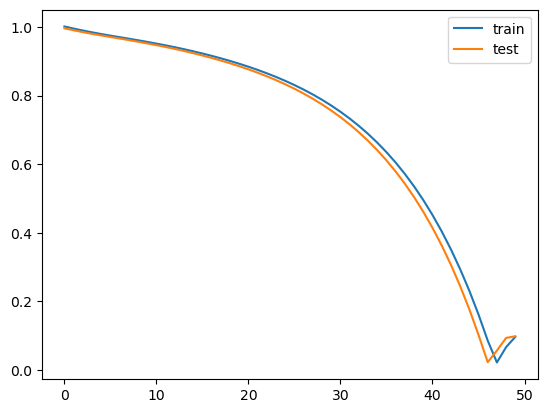

In [11]:
# design network
model = Sequential()
#model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))

#model.add(LSTM(50))

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(50, activation='relu'))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [12]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 0:9]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 0:9]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Test RMSE: 0.100


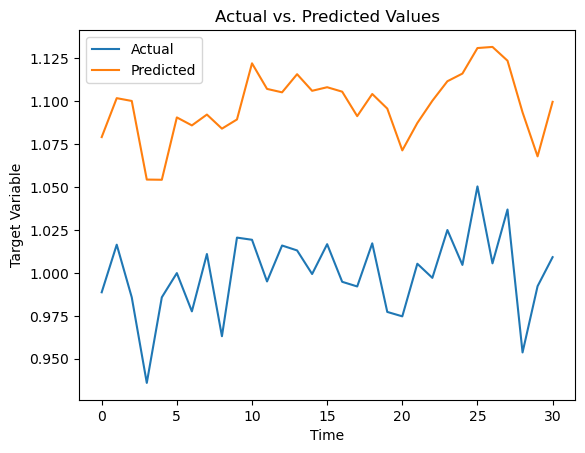

In [13]:
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(inv_y, label='Actual')
plt.plot(inv_yhat, label='Predicted')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

# References:
Understanding LSTM Networks - https://colah.github.io/posts/2015-08-Understanding-LSTMs/

How to Develop LSTM Models for Time Series Forecasting:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

Multivariate Time Series Forecasting with LSTMs in Keras - https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

Hyper Parameter Tunning:
https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/

More on data prep for LSTMs here:
https://machinelearningmastery.com/faq/single-faq/how-do-i-prepare-my-data-for-an-lstm

You can use diagnostics to see if the model is well suited:
https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

You can use grid/random searches of hyperparameters to see if you can do better.

Error is relative, and “good” performance is determined against a baseline method like persistence, more here:
https://machinelearningmastery.com/how-to-know-if-your-machine-learning-model-has-good-performance/

More on how to change a neural net to/form regression to classification:
https://machinelearningmastery.com/faq/single-faq/how-can-i-change-a-neural-network-from-regression-to-classification

optimal lag selection multivariate time series LSTM:
https://www.google.com/search?q=optimal+lag+selection+multivariate+time+series+LSTM&rlz=1C1GCEA_enES852ES852&oq=optimal+lag+selection+multivariate+time+series+LSTM&aqs=chrome..69i57.26984j0j7&sourceid=chrome&ie=UTF-8